Importy

In [21]:
from Number import Number
from Strassen import SMU
import numpy as np
from  timeit import default_timer as timer
import pandas as pd
import matplotlib.pyplot as plt

Generacja tablic do testowania

In [22]:
def gen_mat_of_size_2_power_k (k: int) -> np.ndarray:
    return np.array([[Number(j) for j in i] for i in np.random.uniform(low=10**(-8), high=1, size = (2**k, 2**k))], dtype=Number)

Implementacje mnożenia macierzy

In [23]:
def binet_mat_mul(mat1: np.ndarray, mat2: np.ndarray) -> None:
    mat1@mat2

In [24]:
def strassen_mat_mul(mat1: np.ndarray, mat2: np.ndarray) -> None:
    SMU(mat1, mat2)

In [25]:
def ai_mat_mul(mat1: np.ndarray, mat2: np.ndarray) -> None:
    pass

kod do mierzenia performancu konkretnych mnożeń

In [26]:
def measure_multiplication(name):
    results = []
    for k in range(2, 9):
        add_tmp = Number.ADD_counter
        mul_tmp = Number.MUL_counter
        mat1 = gen_mat_of_size_2_power_k(k)
        mat2 = gen_mat_of_size_2_power_k(k)
        start = timer()
        name(mat1, mat2)
        end = timer()
        results.append([k, Number.ADD_counter-add_tmp, Number.MUL_counter-mul_tmp, end-start])
    df = pd.DataFrame(results, columns=["k", "operacje addytywne", "operacje multiplikatywne", "czas wykonania"])
    return df

Wizualizacje zebranych danych

In [27]:
def visualise_multiplication(data_frame, name):
    powers = data_frame["k"]
    add_cnt= data_frame["operacje addytywne"]
    mul_cnt = data_frame["operacje multiplikatywne"]
    time = data_frame["czas wykonania"]

    plt.plot(powers, add_cnt, label = f"liczba operacji addytywnych przy mnożeniu metodą {name}", color="blue")
    plt.xlabel("potęga")
    plt.ylabel("liczba operacji addytywnych")
    plt.legend()
    plt.semilogy()
    plt.show()

    plt.plot(powers, mul_cnt, label = f"liczba operacji multiplikatywnych przy mnożeniu metodą {name}", color="black")
    plt.xlabel("potęga")
    plt.ylabel("liczba operacji multiplikatywnych")
    plt.legend()
    plt.semilogy()
    plt.show()

    plt.plot(powers, time, label = f"czas wykonania mnożenia metodą {name}", color="black")
    plt.xlabel("potęga")
    plt.ylabel("czas wykonania")
    plt.legend()
    plt.semilogy()
    plt.show()

In [28]:
def show_plot(binet_df, strassen_df, ai_df, name, ylabel):
    powers = binet_df["k"]
    b_data= binet_df[name]
    s_data= strassen_df[name]
    ai_data= ai_df[name]
    plt.plot(powers, b_data, label = f"Bineta", color="blue")
    plt.plot(powers, s_data, label = f"Strassena", color="red")
    plt.plot(powers, ai_data, label = f"zaproponowaną przez sztuczną inteligencję", color="black")
    plt.title(f"{ylabel} przy mnożeniu metodą ...")
    plt.xlabel("potęga")
    plt.ylabel(ylabel)
    plt.legend()
    plt.semilogy()
    plt.show()

def compare_dataframes(binet_df, strassen_df, ai_df):
    name = "operacje addytywne"
    ylabel = "liczba operacji addytywnych"
    show_plot(binet_df, strassen_df, ai_df,name, ylabel)

    name = "operacje multiplikatywne"
    ylabel = "liczba operacji multiplikatywnych"
    show_plot(binet_df, strassen_df, ai_df,name,ylabel)

    name = "czas"
    ylabel = "czas"
    show_plot(binet_df, strassen_df, ai_df,name, ylabel)

Konkretne pomiary

   k  operacje addytywne  operacje multiplikatywne  czas wykonania
0  2                  48                        64        0.000231
1  3                 448                       512        0.001829
2  4                3840                      4096        0.008543
3  5               31744                     32768        0.071417
4  6              258048                    262144        0.493958
5  7             2080768                   2097152        3.804099
6  8            16711680                  16777216       27.895878


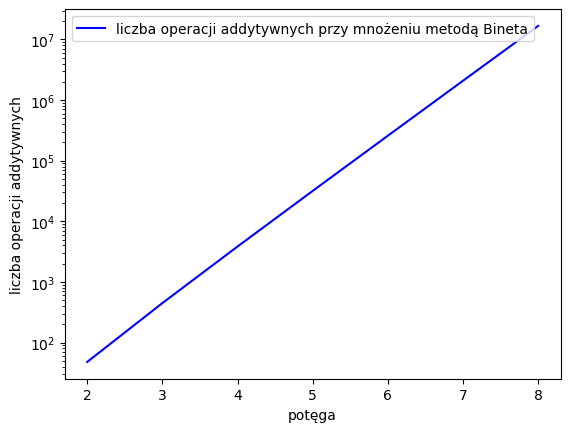

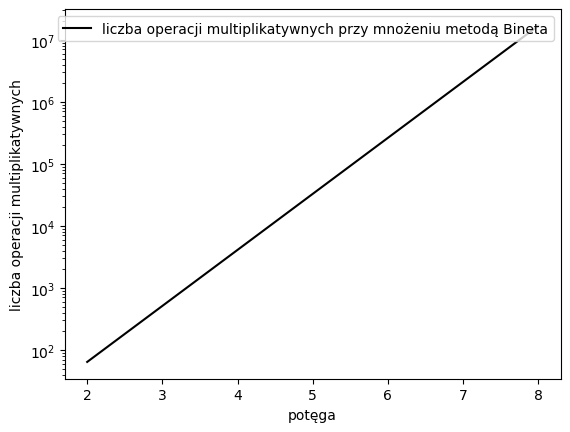

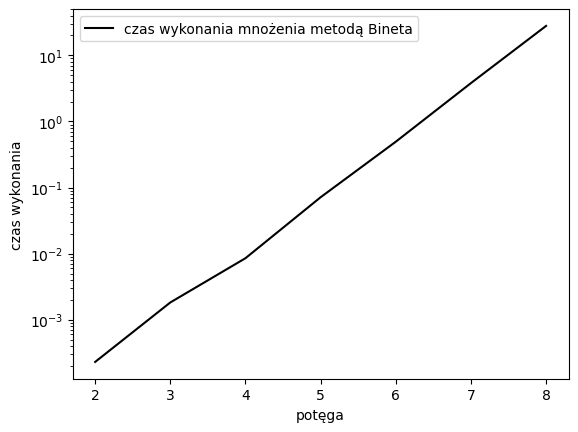

In [29]:
binet_df = measure_multiplication(binet_mat_mul)
print(binet_df)
visualise_multiplication(binet_df, "Bineta")

   k  operacje addytywne  operacje multiplikatywne  czas wykonania
0  2                 132                        49        0.001112
1  3                1116                       343        0.006797
2  4                8580                      2401        0.045411
3  5               63132                     16807        0.243743
4  6              454212                    117649        1.724940
5  7             3228636                    823543       10.879740
6  8            22797060                   5764801       78.735646


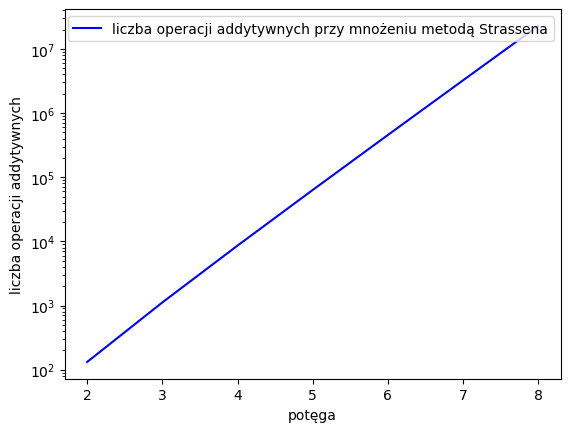

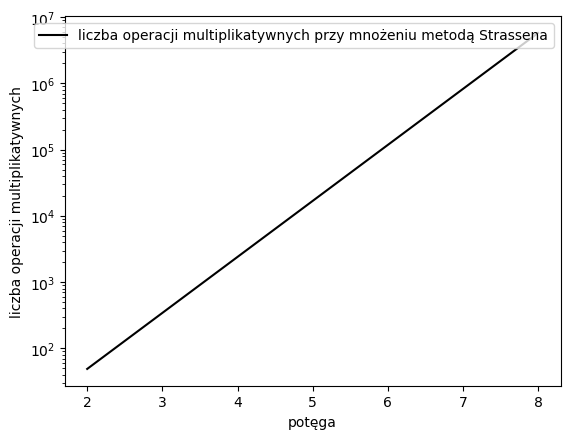

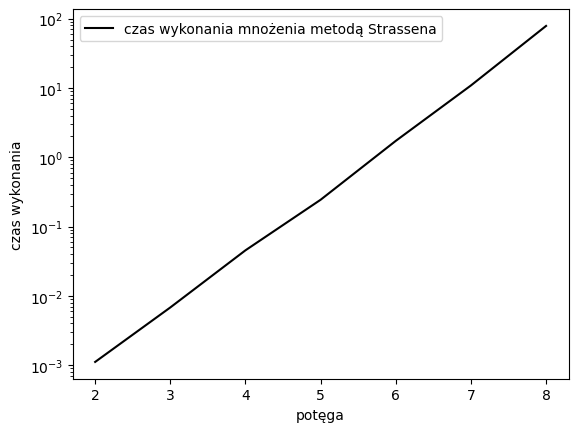

In [30]:
strassen_df = measure_multiplication(strassen_mat_mul)
print(strassen_df)
visualise_multiplication(strassen_df, "Strassena")

   k  operacje addytywne  operacje multiplikatywne  czas wykonania
0  2                   0                         0    6.000000e-07
1  3                   0                         0    3.999999e-07
2  4                   0                         0    6.000000e-07
3  5                   0                         0    1.300000e-06
4  6                   0                         0    9.999999e-07
5  7                   0                         0    1.500000e-06
6  8                   0                         0    7.300000e-06


C:\Users\Przemek\AppData\Local\Temp\ipykernel_11052\2869993027.py:11: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.semilogy()
C:\Users\Przemek\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


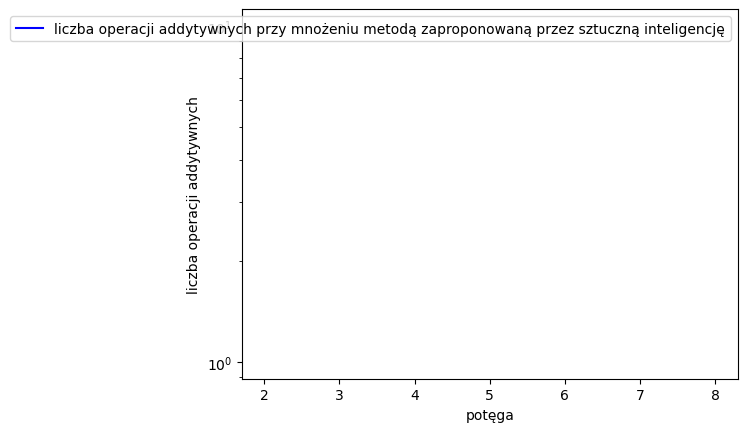

C:\Users\Przemek\AppData\Local\Temp\ipykernel_11052\2869993027.py:18: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.semilogy()
C:\Users\Przemek\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


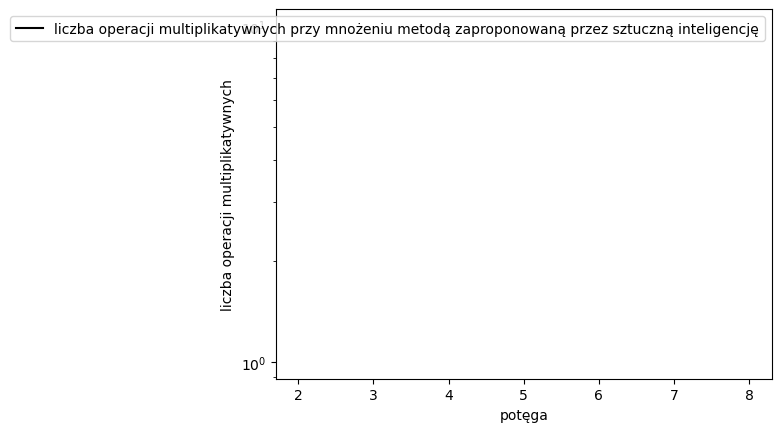

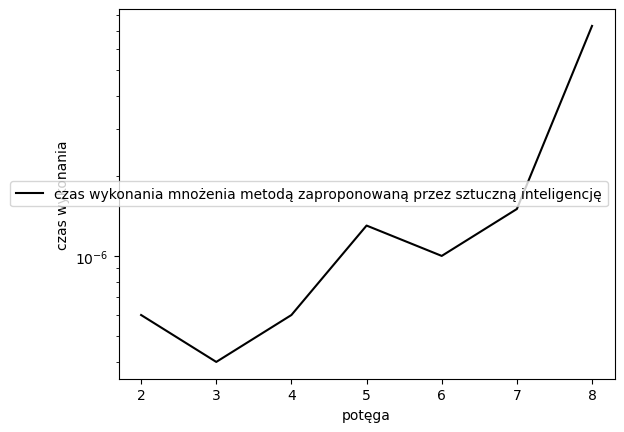

In [31]:
ai_df = measure_multiplication(ai_mat_mul)
print(ai_df)
visualise_multiplication(ai_df, "zaproponowaną przez sztuczną inteligencję")

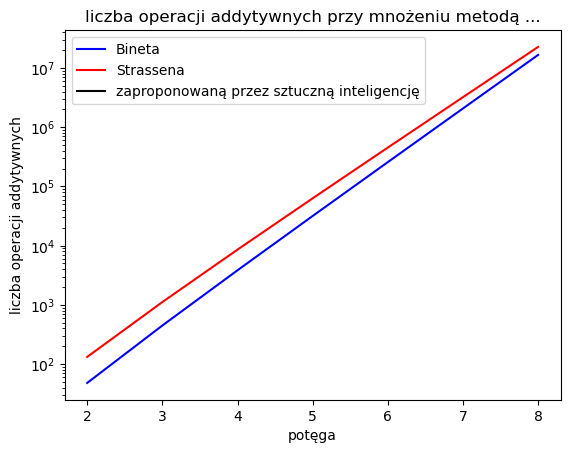

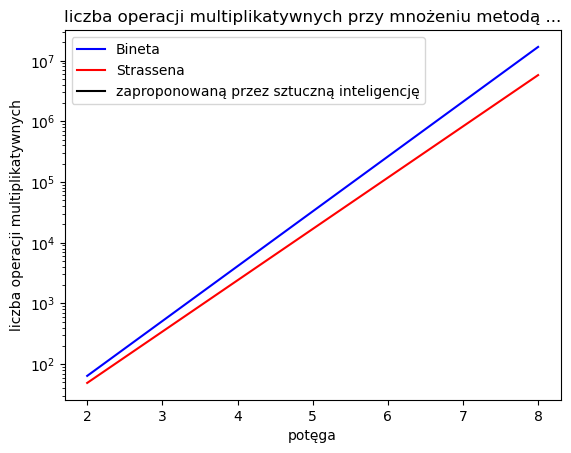

KeyError: 'czas'

In [32]:
compare_dataframes(binet_df, strassen_df, ai_df)